## Arizona Policy Lab Data

Dynata/SSI collected these data. 

$\bullet$ N=1,144 participants were contacted. Most respondents were contacted by email, a smaller sample was contacted by phone. The phone interviews did not come with gender and age. 

$\bullet$ Missing data were imputed through a process known as multiple imputation through chained equations (MICE). It's commonly used in Stata, so this is what I opted to use. 

$\bullet$ I weight back to state population proportions, with respect to age, sex, ethnicity, and race. 


Below you'll see the data -- just scroll down if you're not interested. For presentation purposes, I recoded much of the data as three categories.


In [39]:
library(dplyr)
library(survey)  
library(mice)  
load("~/Desktop/APL Survey/cleaned_data.rda")
head(clean_data)


ID,time_az,interests,interest_r,identity_AZ,identity_AZ_r,identity_US,identity_US_r,needs_met,needs_met_r,...,rep_ft_people,ideo,ideo_r,hispanic,race,christian,income,children,age,sex
1,3,3,Neither,4,Neutral,7,Strong,2,Worse,...,90,2,Liberal,0,1,1,1,0,4,1
2,3,3,Neither,4,Neutral,7,Strong,3,Same,...,20,5,Conservative,0,1,1,4,0,4,2
3,3,4,Similar,7,Strong,7,Strong,3,Same,...,25,4,NA,0,1,1,4,0,3,1
4,3,3,Neither,5,Strong,6,Strong,5,Better,...,0,3,Liberal,0,1,1,3,1,1,1
5,3,3,Neither,3,Weak,7,Strong,3,Same,...,50,4,Conservative,0,1,0,1,0,4,1
6,1,2,Different,4,Neutral,7,Strong,3,Same,...,0,5,NA,0,1,1,1,0,4,2


## Survey Weights

I weighted the data using raking. I weighted the sample to the population based on age, sex, race, ethnicity. The entered numbers below are the marginal distributions for AZ, from the census


In [40]:
### Weight the data ####
library(survey)
model<-svydesign(ids=~1, data=clean_data)
hispanic_dist<-data.frame(hispanic=c(0, 1),
                             Freq=nrow(clean_data)*c(0.69,0.31))
race_dist<-data.frame(race=c(1,2,3,4,5),
                          Freq=nrow(clean_data)*c(0.77, 0.04, 0.03, 0.04, 0.12))
age_dist<-data.frame(age=c(1,2,3,4),
                      Freq=nrow(clean_data)*c(0.32, 0.30, 0.15, 0.23))
sex_dist<-data.frame(sex=c(1,2),
                     Freq=nrow(clean_data)*c(0.50, 0.5))

raked_data<-rake(design=model,
                 sample.margins=list(~hispanic, ~race, ~sex, ~age),
                 population.margins=list(hispanic_dist, race_dist, sex_dist, age_dist))


Warning message in svydesign.default(ids = ~1, data = clean_data):
“No weights or probabilities supplied, assuming equal probability”

##  Cultural Issues 

We start by considering responses to immigration and racial justice issues. The following items were analyzed. 

$\bullet$ **Do you approve or disapprove of the construction of a Border Wall along the US-Mexico border?**

$\bullet$ **To what extent do you support or oppose a pathway to citizenship for immigrants who entered the United States illegally as children, a group commonly known as the Dreamers?**

$\bullet$ **Generally speaking, do you think that immigrants who move to Arizona help the economy of the state, hurt the economy of the state, or make no difference?**

$\bullet$**Generally speaking, do you think that immigrants who move to Arizona help the culture of the state, hurt the culture of the state, or make no difference?**


$\bullet$ **Following the murder of George Floyd in Minneapolis, protests occurred throughout the United States, including areas of Arizona. Do you approve or disapprove of these protest activities?**





In [41]:
library(survey)
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=3)

uni_dist<-function(var, design, title,
                   xlabel="Test", upper=0.5){
  f<-as.formula(paste0("~", var))
  tab_w<-svytable(f, design) %>%
    as.data.frame() %>%
    mutate(Proportion=Freq/sum(Freq)) %>%
    arrange(desc(Proportion)) 
    return(tab_w)
}
uni_plot<-function(tab_w, title, upper){
  plot<-ggplot(data=tab_w, mapping=aes(x=tab_w[,1], y=Proportion)) +
    geom_col()+
    coord_flip()+
    theme_bw() +
    theme(axis.ticks=element_blank())+
    ggtitle(title)+
    scale_y_continuous("Proportion", limits=c(0,upper))+
    scale_x_discrete("")+
    labs(caption="Arizona Policy Lab Election and Policy Survey")
  return(plot)
}


***Once again, the code can be ignored.** 

**Arizonans are polarized on the issue of building a southern border while**, while on the whole holding favorable attitudes towards immigrants. Large numbers believe immigrants help the culture in Arizona, and favor a path for citizenship for Dreamers.**

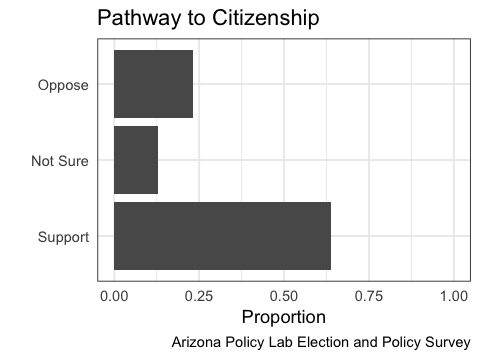

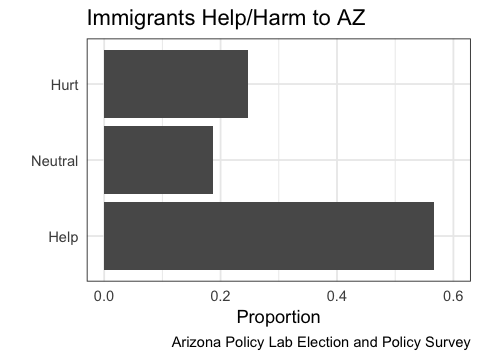

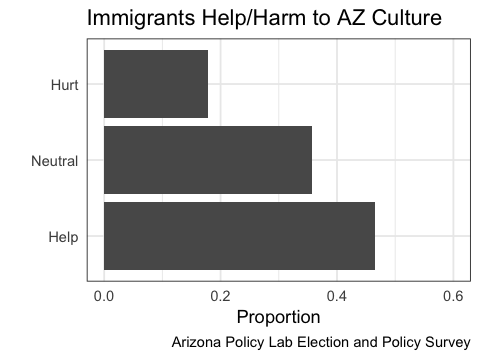

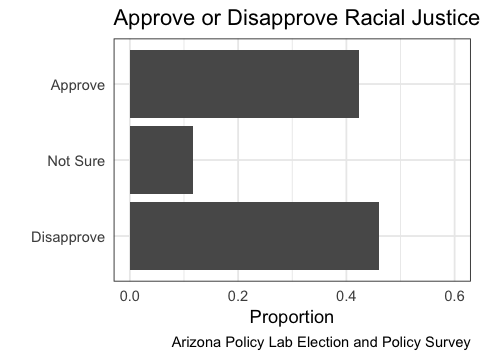

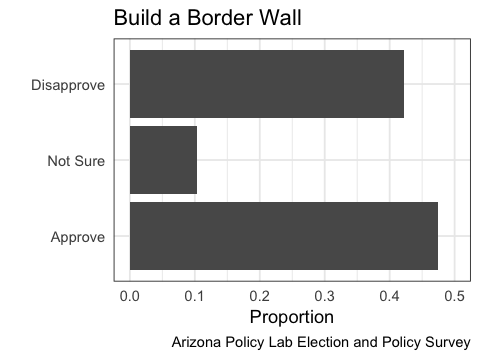

In [19]:
options(repr.plot.width=4, repr.plot.height=3)
tab_w<-uni_dist("imm_citizenship_r", raked_data, title="Pathway to Citizenship", xlabel="Citizenship", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Support", "Not Sure", "Oppose"))
uni_plot(tab_w, title="Pathway to Citizenship", upper=1)

tab_w<-uni_dist("imm_hurt_az_r", raked_data, title="Do Immigrants Help or Hurt AZ?", xlabel="Harm", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Help", "Neutral", "Hurt"))
uni_plot(tab_w, title="Immigrants Help/Harm to AZ", upper=0.6)

tab_w<-uni_dist("imm_hurt_culture_r", raked_data, title="Do Immigrants Help or Hurt Culture?", xlabel="Harm", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Help", "Neutral", "Hurt"))
uni_plot(tab_w, title="Immigrants Help/Harm to AZ Culture", upper=0.6)

tab_w<-uni_dist("oppose_race_protests_r", raked_data, title="Approve or Disapprove Racial Justice Protests", xlabel="Harm", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Disapprove", "Not Sure", "Approve"))

uni_plot(tab_w, title="Approve or Disapprove Racial Justice Protests", upper=0.6)
tab_w<-uni_dist("border_wall_r", raked_data, title="Beliefs about Building a Southern Border Wall", xlabel="Border Wall", upper=1)

tab_w[,1]<-factor(tab_w[,1], c("Approve", "Not Sure", "Disapprove"))
uni_plot(tab_w, title="Build a Border Wall", upper=0.5)


##  Covid and Public Health

We start by considering responses to immigration and racial justice issues. The following items were analyzed. 

$\bullet$  **Next, we’d like to ask for your views on the COVID-19 Pandemic.  Have you or someone in your immediate family tested positive for COVID-19?**


$\bullet$ **Have you or someone in your immediate family become unemployed as a result of the COVID-19 pandemic?**

$\bullet$ **When you go out in public, how often do you wear a face mask?**

 $\bullet$ **Do you believe that face-masks should be required by law when Arizonans are out in public?**


$\bullet$ **Do you feel that K-12 schools in Arizona should have in-person classes in the fall or should classes take place online?**


$\bullet$ **Do you feel that universities in Arizona should have in-person classes in the fall or should classes take place online?**


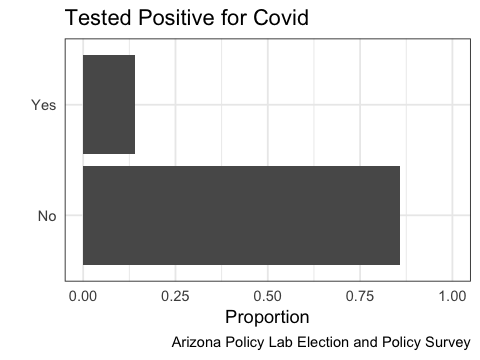

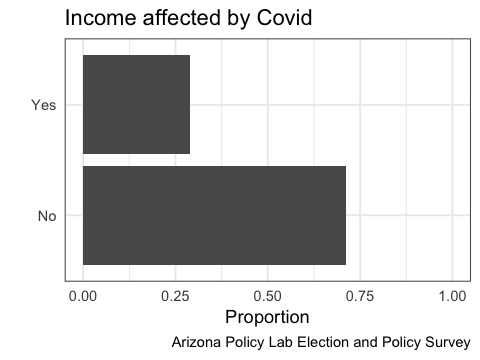

  wear_mask_r      Freq Proportion
1       Often 999.79159 0.87394369
2   Half Time  79.45788 0.06945618
3      Rarely  64.75054 0.05660012


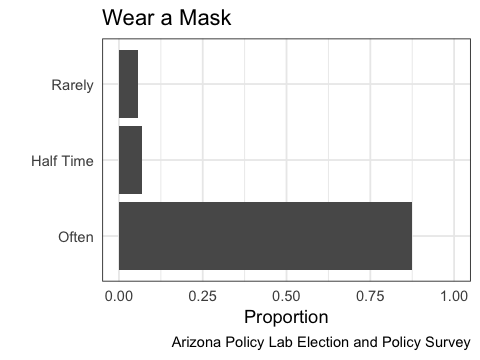

  public_mask_r      Freq Proportion
1           Yes 793.50421 0.69362256
2            No 277.88701 0.24290822
3      Not Sure  72.60878 0.06346922


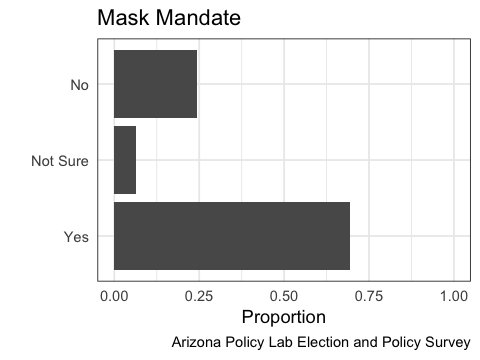

In [42]:
options(repr.plot.width=4, repr.plot.height=3)
tab_w<-uni_dist("covid_affected_r", raked_data, title="Family/Self Positive for Covid", 
                xlabel="Citizenship", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("No", "Yes"))
uni_plot(tab_w, title="Tested Positive for Covid", upper=1)

tab_w<-uni_dist("covid_finance_r", raked_data, title="Income affected by Covid",
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("No", "Yes"))
uni_plot(tab_w, title="Income affected by Covid", upper=1)

tab_w<-uni_dist("wear_mask_r", raked_data, title="Wear a Mask",
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Often", "Half Time", "Rarely" ))
uni_plot(tab_w, title="Wear a Mask", upper=1)

print(tab_w)
tab_w<-uni_dist("public_mask_r", raked_data, title="Mask Mandate",
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Yes", "Not Sure", "No" ))
uni_plot(tab_w, title="Mask Mandate", upper=1)

print(tab_w)



**A large portion proportion of Arizona respondents (87%) regularly wear facemasks and 69% prefer a mask mandate. Only 6% of respondents report rarely or never wearing a mask.  The remaining 7% report wearing a mask about half the time.** 

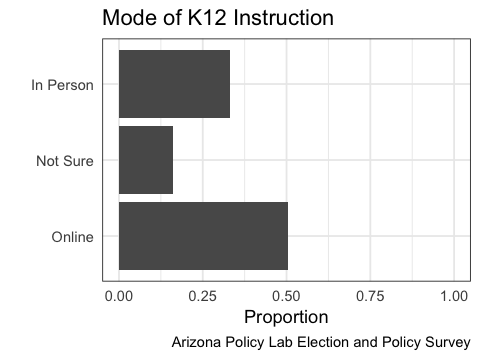

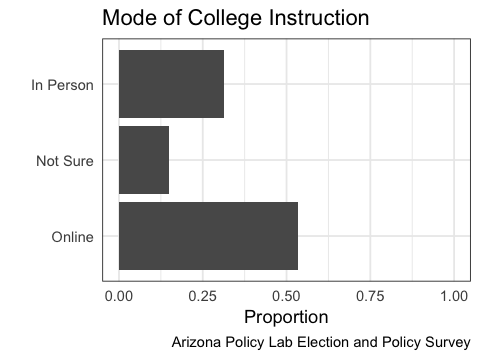

In [43]:
options(repr.plot.width=4, repr.plot.height=3)
tab_w<-uni_dist("k12_r", raked_data, title="", 
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Online", "Not Sure", "In Person"))
uni_plot(tab_w, title="Mode of K12 Instruction", upper=1)

tab_w<-uni_dist("college_r", raked_data, title="", 
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Online", "Not Sure", "In Person"))
uni_plot(tab_w, title="Mode of College Instruction", upper=1)



## Covid and Elected Officials



$\bullet$ **Do you approve or disapprove of how President Donald Trump has handled the COVID-19 pandemic?**

$\bullet$ **Do you approve or disapprove of how Governor Doug Ducey has handled the COVID-19 pandemic?**


$\bullet$ **Do you approve or disapprove of how the mayor in the city or town where you live has handled the COVID-19 pandemic?**


[1] "Marginal Distribution:"


trump_covid_r,Freq,Proportion
Disapprove,519.5186,0.4541247
Approve,491.6906,0.4297995
Not Sure,132.7908,0.1160758


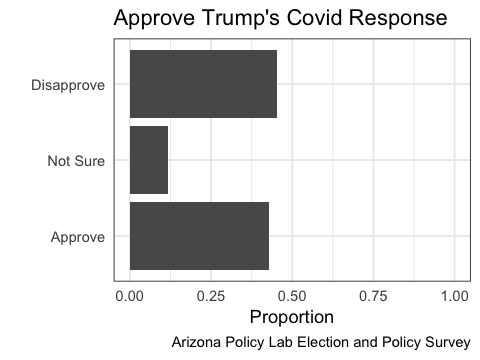

[1] "Marginal Distribution:"


ducey_covid_r,Freq,Proportion
Disapprove,537.9547,0.4702401
Approve,442.4468,0.3867542
Not Sure,163.5985,0.1430057


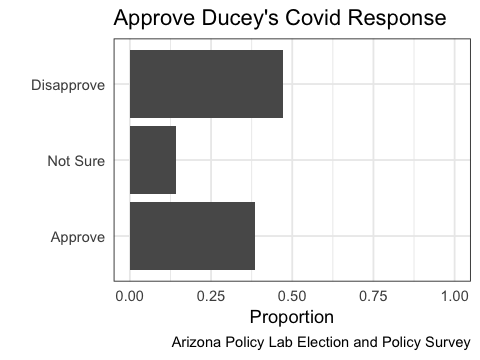

[1] "Marginal Distribution:"


mayor_covid_r,Freq,Proportion
Approve,620.8686,0.5427173
Not Sure,296.7118,0.2593634
Disapprove,226.4196,0.1979193


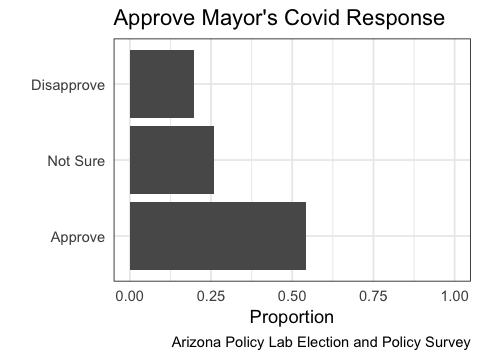

In [46]:
tab_w<-uni_dist("trump_covid_r", raked_data, title="", 
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Approve", "Not Sure", "Disapprove"))
uni_plot(tab_w, title="Approve Trump's Covid Response", upper=1)
print("Marginal Distribution:")
tab_w

tab_w<-uni_dist("ducey_covid_r", raked_data, title="", 
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Approve", "Not Sure", "Disapprove"))
uni_plot(tab_w, title="Approve Ducey's Covid Response", upper=1)
print("Marginal Distribution:")
tab_w

tab_w<-uni_dist("mayor_covid_r", raked_data, title="", 
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Approve", "Not Sure", "Disapprove"))
uni_plot(tab_w, title="Approve Mayor's Covid Response", upper=1)
print("Marginal Distribution:")
tab_w




**Arizonans are generally disapproving of Trump and Ducey's covid response; however, there is a greater gap for Ducey, suggesting that Arizonans blame the governor, and less so the president. What is also noteworthy is that a majority of Arizonans are happy with their mayor's covid response**

## Partisan Differences

Below I present reactions to these items by party. Again, feel free to just ignore the code and scroll down to the figures.

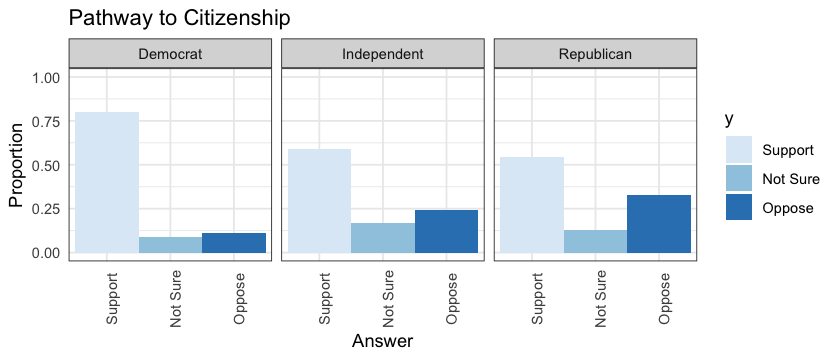

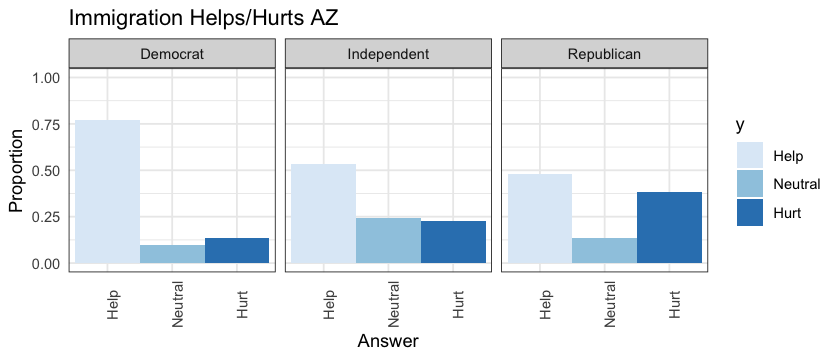

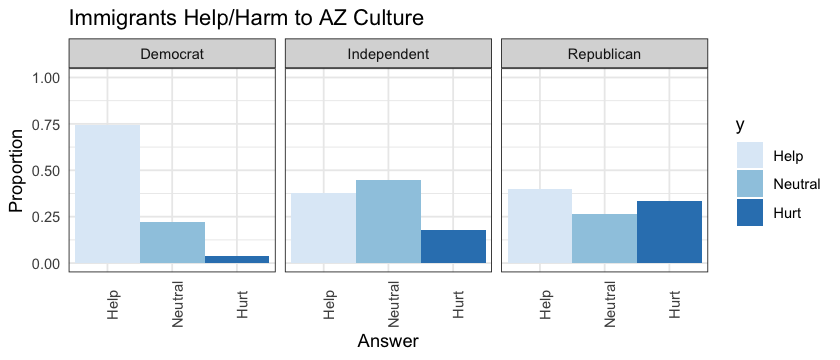

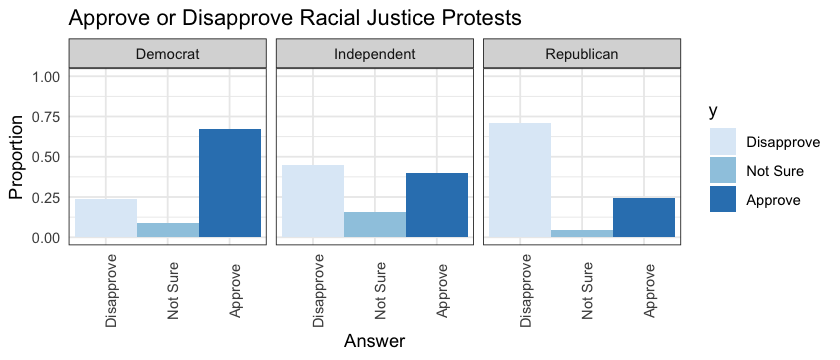

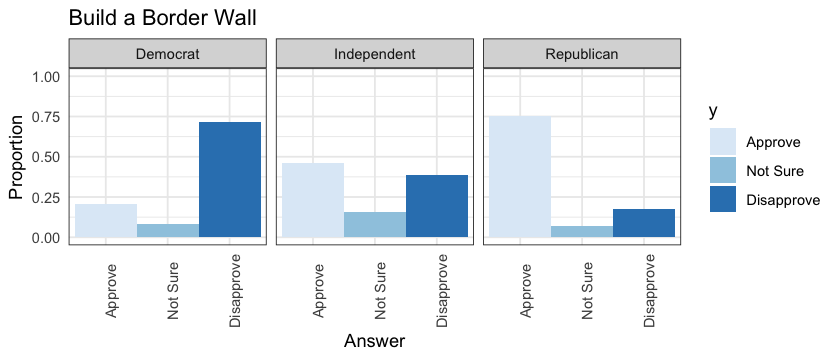

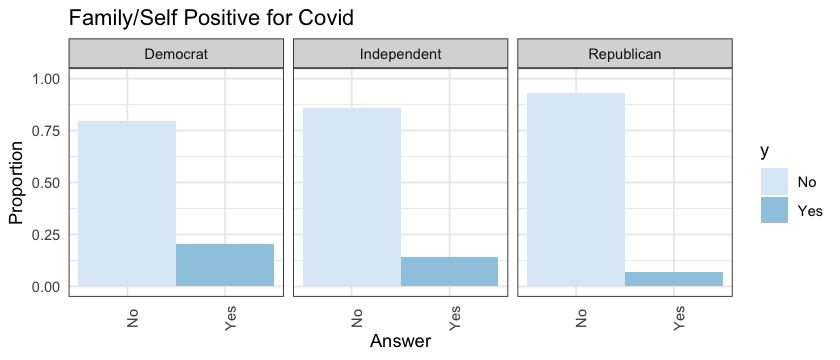

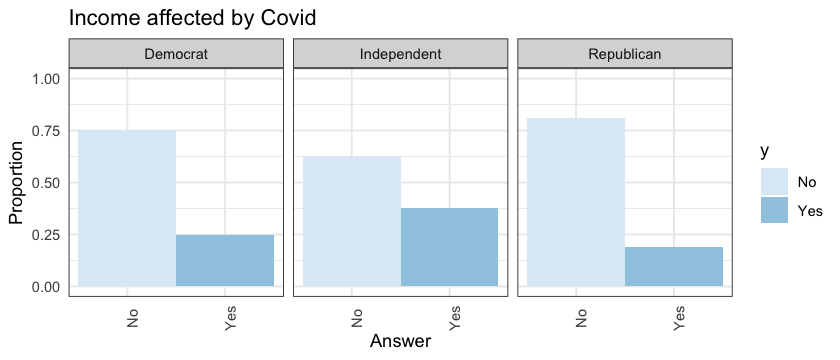

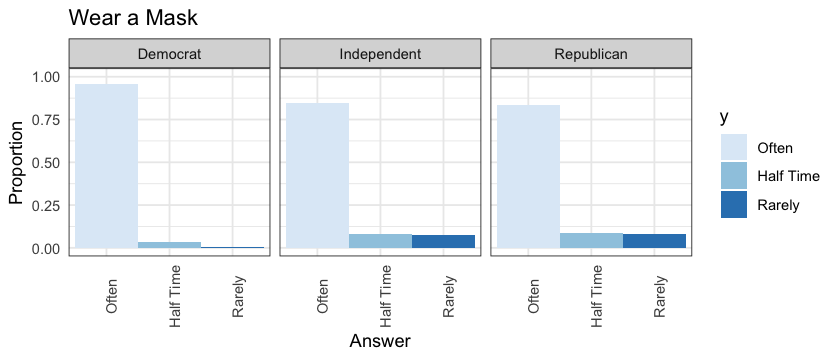

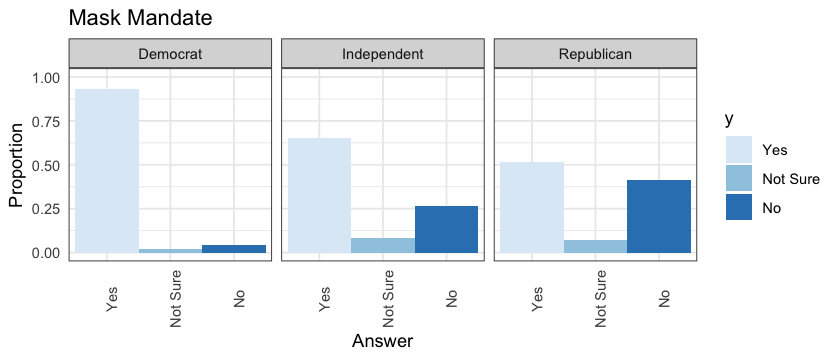

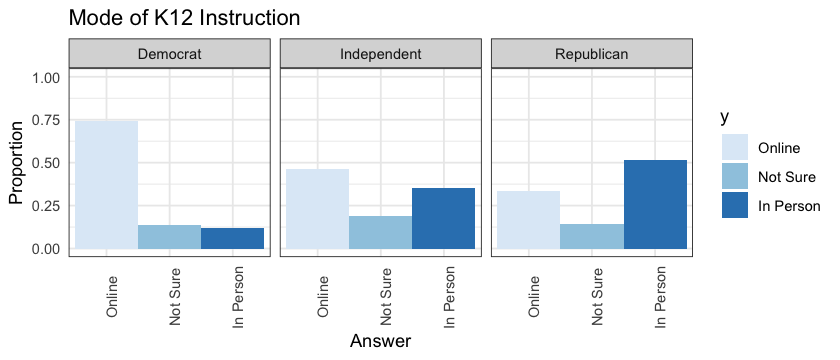

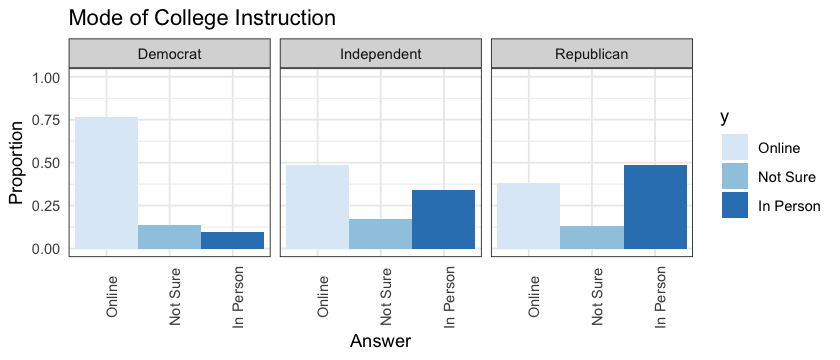

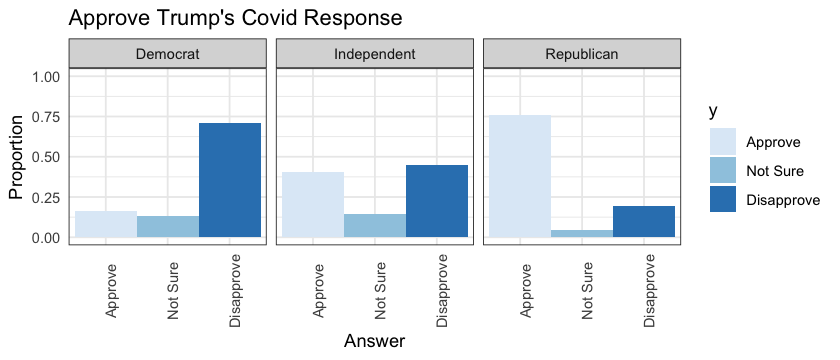

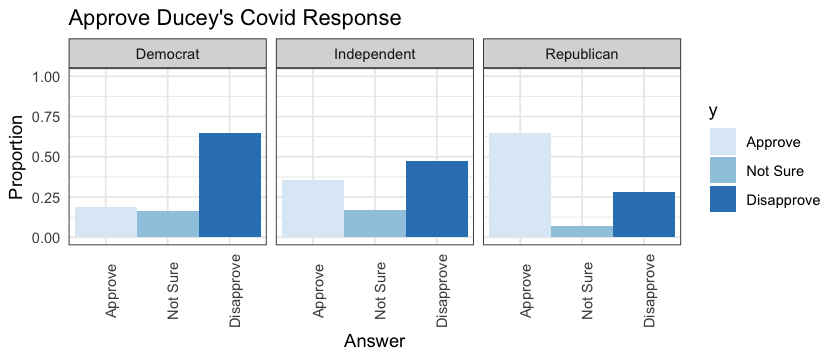

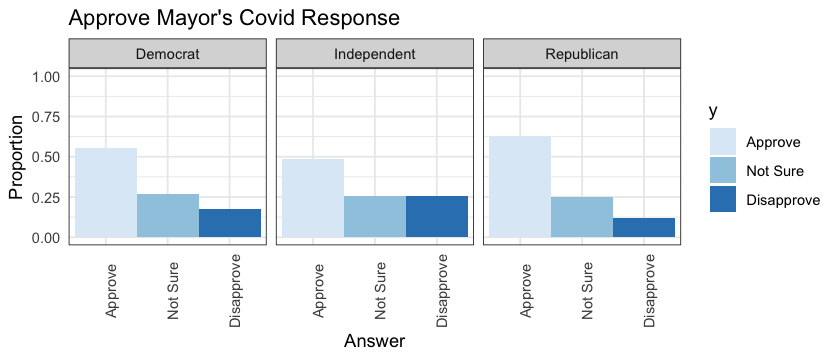

In [51]:
options(repr.plot.width=7, repr.plot.height=3)



  ## Take this function apart
bi_plot<-function(var1, var2, design, title="This",
                   xlabel="That", ylabel="And"){
  f<-as.formula(paste0("~", var1,"+", var2))
  tab_w<-svytable(f, design) %>%
    as.data.frame() %>% group_by(pid3) %>%
    mutate(total=sum(Freq)) %>%
    ungroup() %>%
   mutate(Proportion=Freq/total) 
  
  names(tab_w)<-c("y", "group", "frequency", "total", "Proportion")
  return(tab_w)
}

### Enter all the variables here

plot.fun<-function(title, upper) { 
    plot <- ggplot(tab_w, aes(x = y, y = Proportion, fill = y)) + 
        facet_wrap(~group) + geom_bar(width = 1, stat = "identity") + 
        scale_fill_brewer() + theme_bw() + theme(axis.ticks = element_blank(), axis.text.x = element_text(angle = 90)) + 
        ggtitle(title) + scale_y_continuous("Proportion", limits = c(0, upper)) + scale_x_discrete("Answer")
    return(plot)
}

tab_w<-bi_plot("imm_citizenship_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Support", "Not Sure", "Oppose"))
plot.fun("Pathway to Citizenship", 1)

tab_w<-bi_plot("imm_hurt_az_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Help", "Neutral", "Hurt"))
plot.fun("Immigration Helps/Hurts AZ", 1)

tab_w<-bi_plot("imm_hurt_culture_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Help", "Neutral", "Hurt"))
plot.fun("Immigrants Help/Harm to AZ Culture", 1)

tab_w<-bi_plot("oppose_race_protests_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Disapprove", "Not Sure", "Approve"))
plot.fun("Approve or Disapprove Racial Justice Protests", 1)

tab_w<-bi_plot("border_wall_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Approve", "Not Sure", "Disapprove"))
plot.fun("Build a Border Wall", 1)

tab_w<-bi_plot("covid_affected_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("No", "Yes"))
plot.fun("Family/Self Positive for Covid", 1)

tab_w<-bi_plot("covid_finance_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("No", "Yes"))
plot.fun("Income affected by Covid", 1)

tab_w<-bi_plot("wear_mask_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Often", "Half Time", "Rarely" ))
plot.fun("Wear a Mask", 1)

tab_w<-bi_plot("public_mask_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y,  c("Yes", "Not Sure", "No" ))
plot.fun("Mask Mandate", 1)

tab_w<-bi_plot("k12_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Online", "Not Sure", "In Person"))
plot.fun("Mode of K12 Instruction", 1)

tab_w<-bi_plot("college_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y,c("Online", "Not Sure", "In Person"))
plot.fun("Mode of College Instruction", 1)

tab_w<-bi_plot("trump_covid_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y,c("Approve", "Not Sure", "Disapprove"))
plot.fun("Approve Trump's Covid Response", 1)


tab_w<-bi_plot("ducey_covid_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y,c("Approve", "Not Sure", "Disapprove"))
plot.fun("Approve Ducey's Covid Response", 1)


tab_w<-bi_plot("mayor_covid_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y,c("Approve", "Not Sure", "Disapprove"))
plot.fun("Approve Mayor's Covid Response", 1)


